# Python 的 50+ 練習：資料科學學習手冊

> 起步走

[數聚點](https://www.datainpoint.com) | 郭耀仁 <https://linktr.ee/yaojenkuo>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 關於視覺化

## 什麼是視覺化

視覺化是致力於將抽象性概念具體化的學科，透過圖形中的大小、顏色或形狀等元素把原始資料、函數或方程式等所蘊含的特徵表達給瀏覽的人，進而將抽象的資訊轉換為溝通對象能快速掌握理解的精簡內容。

>The simple graph has brought more information to the data analyst’s mind than any other device.
>
>[John Tukey](https://en.wikipedia.org/wiki/John_Tukey)

## 資料視覺化將資料值映射為 "Aesthetics"

常見的 "Aesthetics" 有

- 位置。
- 大小。
- 線條的寬度。
- 形狀。
- 顏色。
- 線條的樣式。

## 不同型態的資料值

- 數值：連續、浮點數。
- 數值：離散、整數、具有固定間隔的浮點數。
- 類別：無序或有序的因素、文字。
- 日期、時間、日期時間。

## 為什麼資料需要視覺化

視覺化在探索性資料分析中佔有舉足輕重的地位，因為對人來說原始資料是相當抽象的。

## 抽象的原始資料

例如在「資料科學模組 NumPy 入門」章節我們透過 `np.random` 建立的隨機 `ndarray`

In [2]:
m = 10000
uniform_ndarray = np.random.random(m)
normal_ndarray = np.random.normal(0, 1, m)
randint_ndarray = np.random.randint(1, 7, size=m)
print(uniform_ndarray)
print(normal_ndarray)
print(randint_ndarray)

[0.8328252  0.17963246 0.98989884 ... 0.77246711 0.47014093 0.18164696]
[ 0.09042692 -2.0285916   0.03305543 ... -1.46806525  0.6416806
  0.07416139]
[4 5 3 ... 6 1 2]


## 將原始資料視覺化

In [3]:
def show_uniform_ndarray(arr):
    fig = plt.figure()
    ax = plt.axes()
    ax.hist(arr, bins=50)
    plt.show()

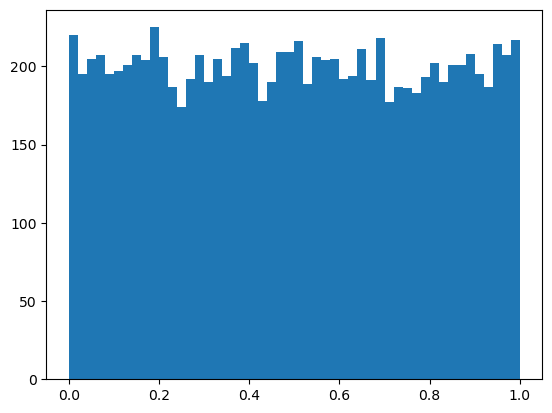

In [4]:
show_uniform_ndarray(uniform_ndarray)

## 將原始資料視覺化（續）

In [5]:
def show_normal_ndarray(arr):
    fig = plt.figure()
    ax = plt.axes()
    ax.hist(arr, bins=50)
    plt.show()

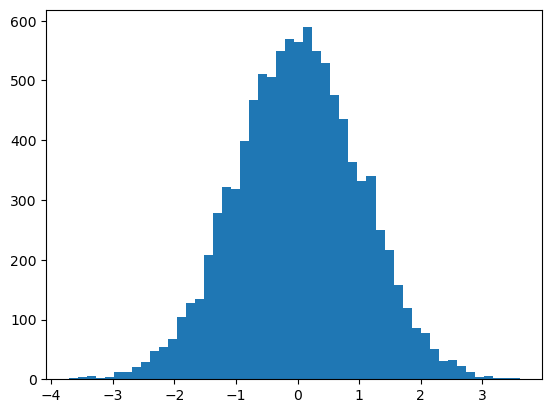

In [6]:
show_normal_ndarray(normal_ndarray)

## 將原始資料視覺化（續）

In [7]:
def show_randint_ndarray(arr):
    fig = plt.figure()
    ax = plt.axes()
    uniques, counts = np.unique(arr, return_counts=True)
    ax.bar(uniques, counts)
    plt.show()

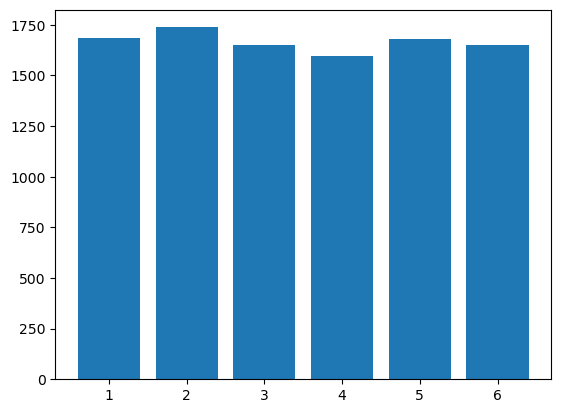

In [8]:
show_randint_ndarray(randint_ndarray)

## 抽象的數學式

\begin{equation}
S(x) = \frac{1}{1 + e^{-x}}
\end{equation}

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def plot_sigmoid(x_arr, y_arr):
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(x_arr, y_arr)
    ax.set_xticks([])
    ax.set_yticks([0, 0.5, 1])
    ax.set_yticklabels(['0', '0.5', '1'])
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_title('$S(x) = 1/(1+e^{-x})$')
    plt.show()

x = np.linspace(-10, 10)
S = sigmoid(x)

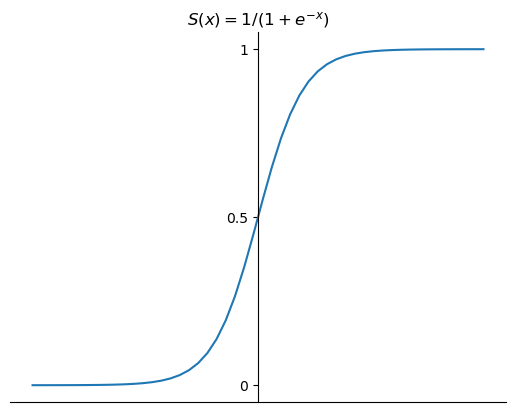

In [10]:
plot_sigmoid(x, S)

## 資料科學家利用線圖描述損失函數（Loss functions）

In [11]:
def plot_cross_entropy(x_arr):
    y0 = -np.log(1-x_arr)
    y1 = -np.log(x_arr)
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(x_arr, y0, label="$-log(1 - h_{\\theta}(X))$ if y = 0")
    ax.plot(x_arr, y1, label="$-log(h_{\\theta}(X))$ if y = 1")
    ax.legend()
    ax.set_title("Cross Entropy")
    ax.set_xlabel("$h_{\\theta}(X)$")
    ax.set_ylabel("Cost")
    plt.show()
    
x = np.linspace(0.0001, 0.9999, 1000)

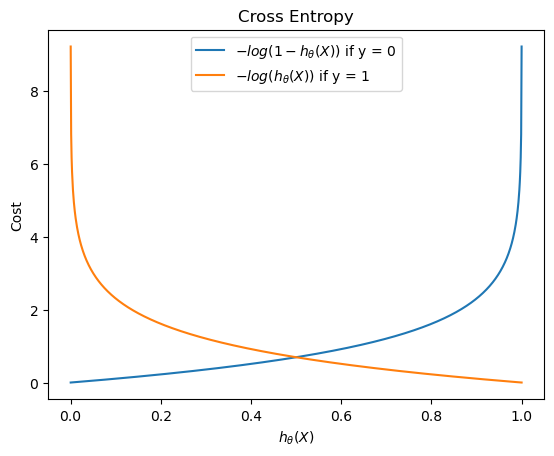

In [12]:
plot_cross_entropy(x)

## 資料科學家利用表面圖描述梯度（Gradients）

![Imgur](https://i.imgur.com/qMsNwXx.png)

來源：[Coursera | Machine Learning](https://www.coursera.org/learn/machine-learning)

## 資料科學家也利用等高線圖描述梯度

![Imgur](https://i.imgur.com/qmeRAdf.png)

來源：[Coursera | Machine Learning](https://www.coursera.org/learn/machine-learning)

## 或者利用填滿等高線圖描述決策邊界（Decision boundary）

來源：<https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py>

In [13]:
from itertools import product
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

def plot_multiple_decision_boundary():
    # Loading some example data
    iris = datasets.load_iris()
    X = iris.data[:, [0, 2]]
    y = iris.target

    # Training classifiers
    clf1 = DecisionTreeClassifier(max_depth=4)
    clf2 = KNeighborsClassifier(n_neighbors=7)
    clf3 = SVC(gamma=.1, kernel='rbf', probability=True)
    eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                        ('svc', clf3)],
                            voting='soft', weights=[2, 1, 2])

    clf1.fit(X, y)
    clf2.fit(X, y)
    clf3.fit(X, y)
    eclf.fit(X, y)

    # Plotting decision regions
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

    for idx, clf, tt in zip(product([0, 1], [0, 1]),
                            [clf1, clf2, clf3, eclf],
                            ['Decision Tree (depth=4)', 'KNN (k=7)',
                             'Kernel SVM', 'Soft Voting']):

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
        axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                      s=20, edgecolor='k')
        axarr[idx[0], idx[1]].set_title(tt)

    plt.show()

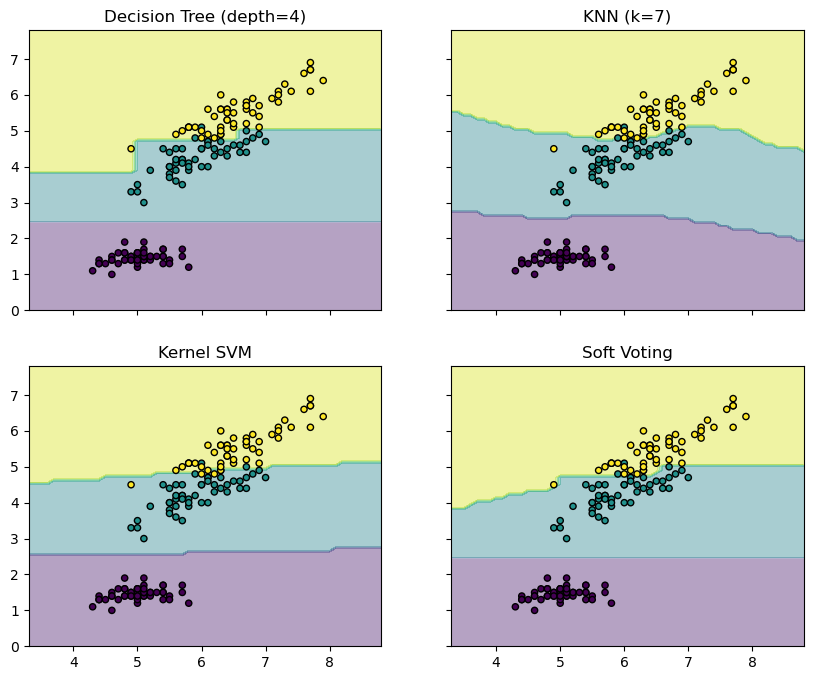

In [14]:
plot_multiple_decision_boundary()

## 好的視覺化特性

- 具有資訊價值。
- 能夠自我解釋。
- 可以重製。
- 經典視覺化：
    - [Charles Minard's map of Napoleon's disastrous Russian campaign of 1812](https://en.wikipedia.org/wiki/Charles_Joseph_Minard#/media/File:Minard.png)
    - [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://youtu.be/jbkSRLYSojo)

## 現代資料科學：以程式設計做資料科學的應用

![](r-for-data-science.png)

來源：[R for Data Science](https://r4ds.had.co.nz)

## 什麼是資料科學的應用場景

- Import 資料的載入。
- Tidy 資料清理。
- Transform 資料外型與類別的轉換。
- Visualise 探索性分析。
- Model 分析與預測模型。
- Communicate 溝通分享。

## 如何選擇資料視覺化的工具

- 能夠 "Wrangle" 資料。
- 能夠將資料值映射為 "Aesthetics"
- 能夠作為溝通的媒介。

## 瞭解資料科學從業者的偏好

- [2022 Kaggle ML & DS Survey](https://www.kaggle.com/c/kaggle-survey-2022)
- [Stack Overflow Trends](https://insights.stackoverflow.com/trends)

## 根據 [2022 Kaggle ML & DS Survey](https://www.kaggle.com/c/kaggle-survey-2022) 中的幾個問題

- What programming languages do you use on a regular basis? (Select all that apply)
- Do you use any of the following data visualization libraries on a regular basis? (Select all that apply)
- Do you use any of the following business intelligence tools? (Select all that apply)

In [15]:
import ks2022

csv_file = "https://kaggle-ml-ds-survey.s3.ap-northeast-1.amazonaws.com/kaggle-survey-2022/kaggle_survey_2022_responses.csv"
ks = ks2022.KaggleSurvey2022(csv_file)

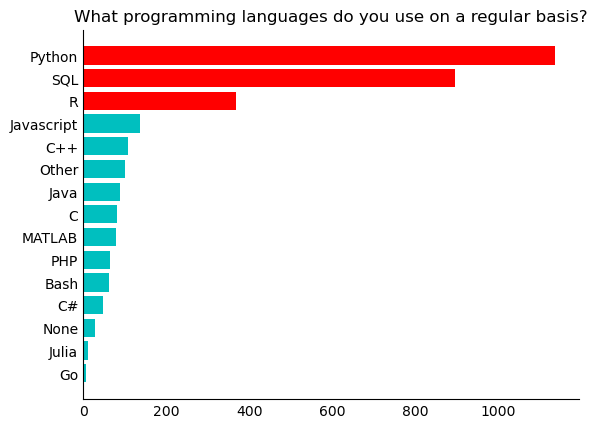

In [16]:
ks.plot_survey_summary(question_index="Q12", n=3)

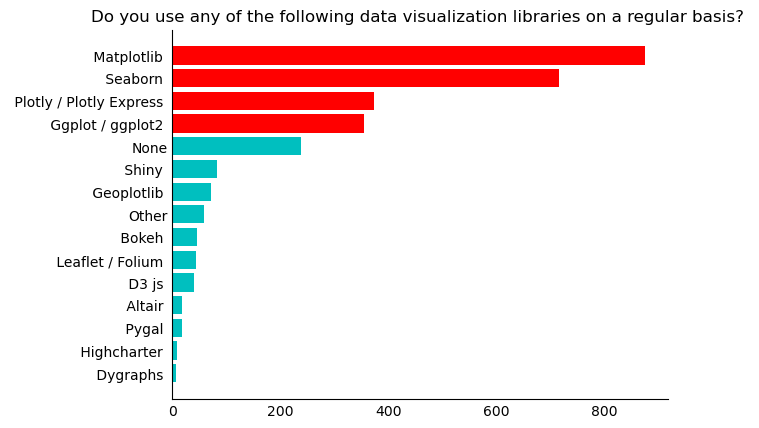

In [17]:
ks.plot_survey_summary(question_index="Q15", n=4)

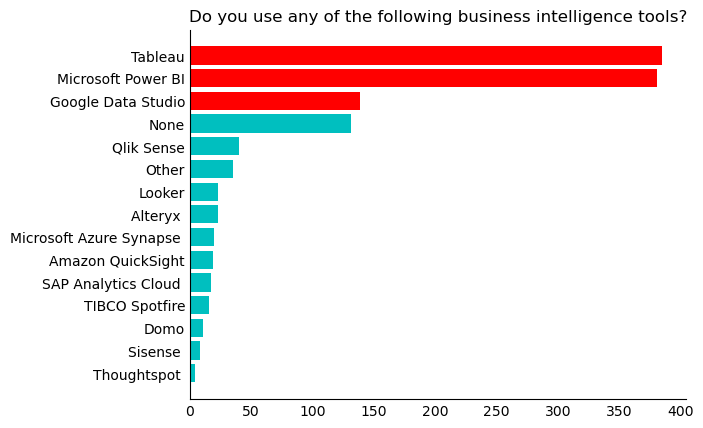

In [18]:
ks.plot_survey_summary(question_index="Q36", n=3)

## 根據 [Stack Overflow Trends](https://insights.stackoverflow.com/trends) 的幾個趨勢

- [程式語言](https://insights.stackoverflow.com/trends?tags=r%2Cpython%2Csql%2Cmatlab%2Cjulia)
- [視覺化模組](https://insights.stackoverflow.com/trends?tags=matplotlib%2Cseaborn%2Cplotly%2Cshiny%2Cggplot2%2Cplotly-dash)

## 資料視覺化的工具選擇依據

- 使用人數的多寡。
- 使用彈性。
- 互動性。
- 可重製性。

## 資料視覺化 123

1. 取得資料。
2. 清理轉換資料為合適的格式、外型。
3. 將資料映射為 "Aesthetics"

> When it comes to making graphs, half the battle occurs before you call any graphing commands.
>
> [Winston Chang](https://twitter.com/winston_chang?lang=en)

## 取得資料

- 常見的資料格式：
    - 純文字檔案。
    - 試算表。
    - 關聯式資料庫。
- 相關 Python 模組：
    - [Requests](https://requests.readthedocs.io/en/latest/)
    - [BeautifulSoup4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
    - [Pandas](https://pandas.pydata.org/)
    - [SQLAlchemy](https://www.sqlalchemy.org/)

## 清理轉換資料為合適的格式、外型

- 手動：MS Excel/Google Sheet
- 相關 Python 模組：
    - [NumPy](https://numpy.org/)
    - [Pandas](https://pandas.pydata.org/)

## 將資料映射為 "Aesthetics"

- 靜態：[Matplotlib](https://matplotlib.org/)、[Seaborn](https://seaborn.pydata.org/)
- 地理資訊：[GeoPandas](https://geopandas.org/en/stable/)、[Folium](https://python-visualization.github.io/folium/)
- 動態：[Plotly](https://plotly.com/)
- 網頁應用程式：[Streamlit](https://streamlit.io/)